## Packages
- install.packages('tm')
- install.packages('textreadr') | package 'textreadr' is not available for this version of R
- install.packages('xml2') | problem copying | Permission denied
- install.packages('wordcloud')
- install.packages('RColorBrewer')
- install.packages('rvest')

### Houve vários erros ao tentar criar um corpus
### Soluções
- read_html() -> From xml2 lib
- html_text() -> From rvest lib
- as.character -> in VectorSource()

In [14]:
library(tm)
library(wordcloud)
library(RColorBrewer)
library(xml2)
library(rvest)

## Criando Corpus
- getSources() -> Fontes de dados possiveis para criação de corpus
- getReaders() -> Tipos de corpus possiveis
- PCorpus() -> Cria um corpus em disco
- VCorpus() -> Cria um corpus volátil (apenas na memória)
- read_html() -> Faz a leitura de html sem tags, apenas conteudos (retorna vetor)

In [15]:
getSources()
getReaders()

# lendo página html
x = read_html("https://en.wikipedia.org/wiki/Artificial_intelligence")
x = html_text(x)
corpus = VCorpus(VectorSource(as.character(x)), readerControl = list(reader=readPlain, language='eng'))
inspect(corpus)

[1] "DataframeSource" "DirSource"       "URISource"       "VectorSource"   
[5] "XMLSource"       "ZipSource"

[1] "readDataframe"           "readDOC"                
 [3] "readPDF"                 "readPlain"              
 [5] "readRCV1"                "readRCV1asPlain"        
 [7] "readReut21578XML"        "readReut21578XMLasPlain"
 [9] "readTagged"              "readXML"

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 200595



## Tratando Corpus
- tm_map( ) -> Faz uma varredura no corpus
- stopwords() -> Retorna palavras sem valor semântico | Podemos indicar um vetor de palavras especificas
- stripWhitespaces -> Retorna espaços em branco
- removePunctuation -> Remove pontuações
- removeNumbers -> Remove números

In [16]:
stopwords('portuguese')
stopwords('english')

# Remove stopwords
corpus = tm_map(corpus, removeWords, stopwords('english'))

# Remove excesso de espaços em branco
corpus = tm_map(corpus, stripWhitespace)

# Remove pontuações
corpus = tm_map(corpus, removePunctuation)

# Remove números
corpus = tm_map(corpus, removeNumbers)

[1] "de"           "a"            "o"            "que"          "e"           
  [6] "do"           "da"           "em"           "um"           "para"        
 [11] "com"          "não"          "uma"          "os"           "no"          
 [16] "se"           "na"           "por"          "mais"         "as"          
 [21] "dos"          "como"         "mas"          "ao"           "ele"         
 [26] "das"          "à"            "seu"          "sua"          "ou"          
 [31] "quando"       "muito"        "nos"          "já"           "eu"          
 [36] "também"       "só"           "pelo"         "pela"         "até"         
 [41] "isso"         "ela"          "entre"        "depois"       "sem"         
 [46] "mesmo"        "aos"          "seus"         "quem"         "nas"         
 [51] "me"           "esse"         "eles"         "você"         "essa"        
 [56] "num"          "nem"          "suas"         "meu"          "às"          
 [61] "minha"        "numa"         "pelos"        "elas"         "qual"        
 [66] "nós"          "lhe"          "deles"        "essas"        "esses"       
 [71] "pelas"        "este"         "dele"         "tu"           "te"          
 [76] "vocês"        "vos"          "lhes"         "meus"         "minhas"      
 [81] "teu"          "tua"          "teus"         "tuas"         "nosso"       
 [86] "nossa"        "nossos"       "nossas"       "dela"         "delas"       
 [91] "esta"         "estes"        "estas"        "aquele"       "aquela"      
 [96] "aqueles"      "aquelas"      "isto"         "aquilo"       "estou"       
[101] "está"         "estamos"      "estão"        "estive"       "esteve"      
[106] "estivemos"    "estiveram"    "estava"       "estávamos"    "estavam"     
[111] "estivera"     "estivéramos"  "esteja"       "estejamos"    "estejam"     
[116] "estivesse"    "estivéssemos" "estivessem"   "estiver"      "estivermos"  
[121] "estiverem"    "hei"          "há"           "havemos"      "hão"         
[126] "houve"        "houvemos"     "houveram"     "houvera"      "houvéramos"  
[131] "haja"         "hajamos"      "hajam"        "houvesse"     "houvéssemos" 
[136] "houvessem"    "houver"       "houvermos"    "houverem"     "houverei"    
[141] "houverá"      "houveremos"   "houverão"     "houveria"     "houveríamos" 
[146] "houveriam"    "sou"          "somos"        "são"          "era"         
[151] "éramos"       "eram"         "fui"          "foi"          "fomos"       
[156] "foram"        "fora"         "fôramos"      "seja"         "sejamos"     
[161] "sejam"        "fosse"        "fôssemos"     "fossem"       "for"         
[166] "formos"       "forem"        "serei"        "será"         "seremos"     
[171] "serão"        "seria"        "seríamos"     "seriam"       "tenho"       
[176] "tem"          "temos"        "tém"          "tinha"        "tínhamos"    
[181] "tinham"       "tive"         "teve"         "tivemos"      "tiveram"     
[186] "tivera"       "tivéramos"    "tenha"        "tenhamos"     "tenham"      
[191] "tivesse"      "tivéssemos"   "tivessem"     "tiver"        "tivermos"    
[196] "tiverem"      "terei"        "terá"         "teremos"      "terão"       
[201] "teria"        "teríamos"     "teriam"

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

## Nuvem de palavras
- wordcloud( ) -> Retorna uma nuvem de palavras
- max.words= -> Numero maximo de palavras
- random.order= -> Ordem aleatória
- colors= -> Cores das palavras
- rot.per= -> Rotação das palavras | Porcentagem
- use.r.layout= -> Indica layout

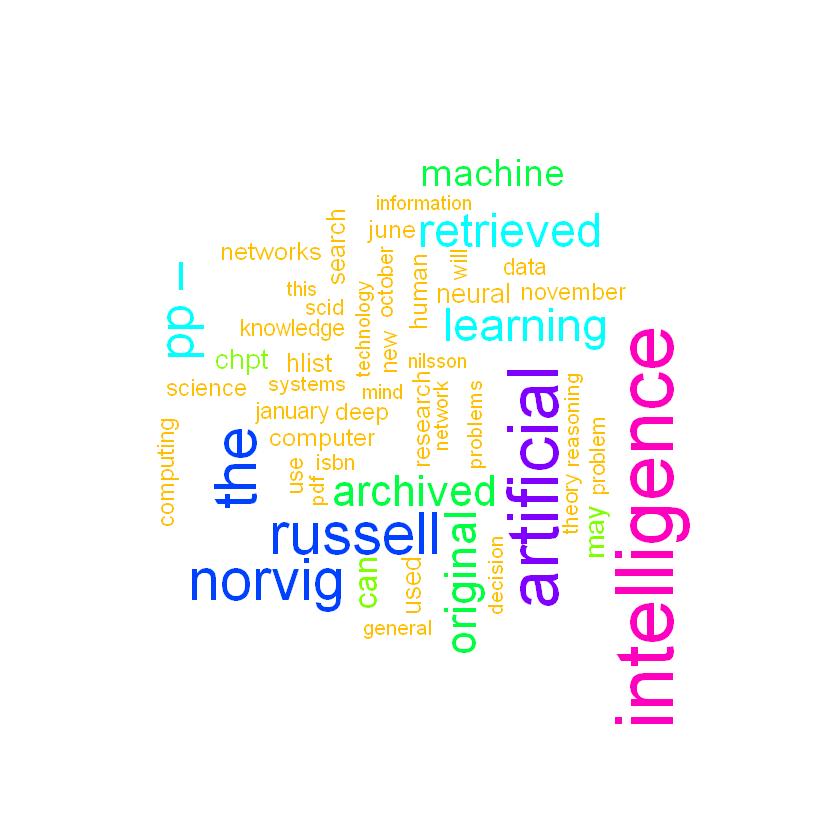

In [17]:
wordcloud(corpus, max.words = 50, random.order = T, colors = rainbow(8),
rot.per = 0.5, use.r.layout = T)

## Matriz de termos frequentes
- TermDocumentMatrix( ) -> Retorna termos encontrados numa matriz
- findFreqTerms( ) -> Retorna termos mais frequentes
- removeSparseTerms( ) -> Remove termos infrequentes

In [19]:
freq = TermDocumentMatrix(corpus)
freq

# Coerção para R Matrix
matriz = as.matrix(freq)
matriz

# Ordenamos termos de acordo com sua frequencia
matriz = sort(rowSums(matriz), decreasing = T)
head(matriz)

# Criação de um data frame
matriz = data.frame(words=names(matriz), freq=matriz)
head(matriz, 100)

# Busca termos frequentes
findFreqTerms(freq, 500, Inf)

# Remove termos infrequentes
removeSparseTerms(freq, 0.4)

<<TermDocumentMatrix (terms: 5309, documents: 1)>>
Non-/sparse entries: 5309/0
Sparsity           : 0%
Maximal term length: 807
Weighting          : term frequency (tf)

,1
–in,1
—refers,1
current,1
million,1
philosophy,1
science,1
utc,1
‘can,2
‘scraped’,1
§ machine,1


intelligence   artificial      russell          the       norvig         pp – 
         211          183          148          147          144          121

,words,freq
,<chr>,<dbl>
intelligence,intelligence,211
artificial,artificial,183
russell,russell,148
the,the,147
norvig,norvig,144
pp –,pp –,121
retrieved,retrieved,112
learning,learning,109
original,original,102


character(0)

<<TermDocumentMatrix (terms: 5309, documents: 1)>>
Non-/sparse entries: 5309/0
Sparsity           : 0%
Maximal term length: 807
Weighting          : term frequency (tf)

## Nuvem tratada
- dados -> utilizamos a coluna words da matriz
- frequencia -> utilizamos a coluna freq da matriz 

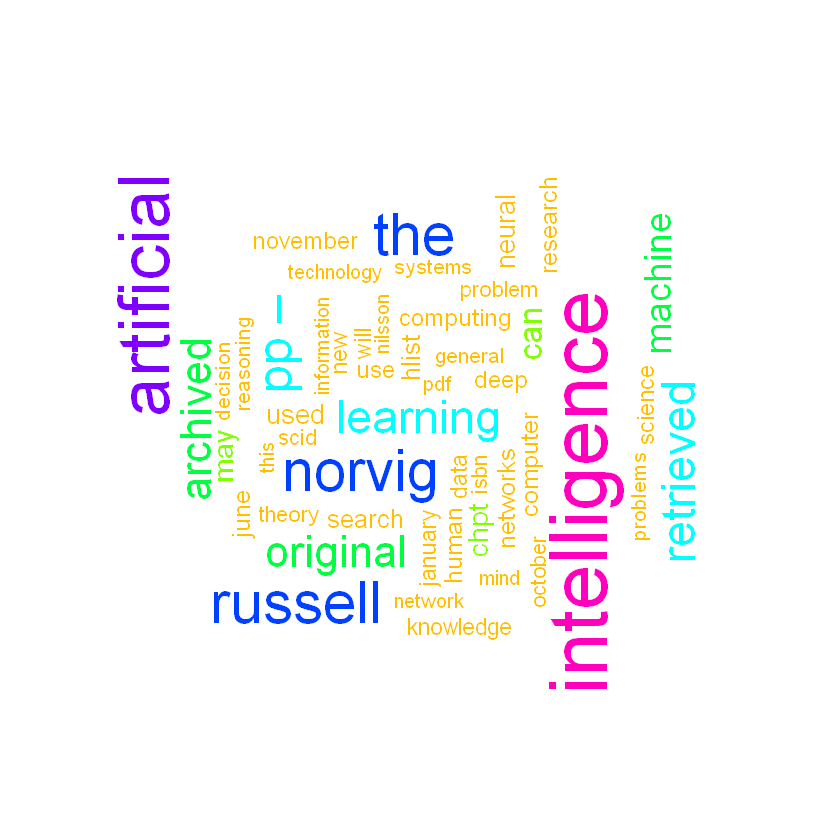

In [20]:
wordcloud(
    matriz$words, matriz$freq, max.words = 50, random.order = T,
    colors = rainbow(8), rot.per = 0.5, use.r.layout = T
)